In [38]:
#Import libraries 
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df_covid = pd.read_csv('C:/Maryam/ODU/Fall2021/DataVisualisation/HWs/HW7/us.csv')
df_covid.head()

,date,geoid,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,1/21/2020,USA,1,0.14,0.0,0,0.0,0.0
1,1/22/2020,USA,0,0.14,0.0,0,0.0,0.0
2,1/23/2020,USA,0,0.14,0.0,0,0.0,0.0
3,1/24/2020,USA,1,0.29,0.0,0,0.0,0.0
4,1/25/2020,USA,1,0.43,0.0,0,0.0,0.0


In [41]:
df_covid.isnull().sum()

date                   0
geoid                  0
cases                  0
cases_avg              0
cases_avg_per_100k     0
deaths                 0
deaths_avg             0
deaths_avg_per_100k    0
dtype: int64

In [42]:
df_covid.shape

(679, 8)

In [43]:
df_covid.describe()

,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,71298.223859,70414.986701,21.221429,1147.706922,1120.393814,0.337614
std,65529.562321,59597.455820,17.961358,986.124640,809.179478,0.243871
min,-23999.000000,0.140000,0.000000,0.000000,0.000000,0.000000
25%,25413.500000,26119.655000,7.870000,409.000000,597.120000,0.180000
50%,50468.000000,54594.060000,16.450000,917.000000,931.050000,0.280000
75%,94528.500000,94425.140000,28.455000,1611.500000,1570.620000,0.475000
max,301138.000000,251231.860000,75.720000,5463.000000,3342.210000,1.010000


In [45]:
df_main_covid = df_covid.drop(['cases_avg','geoid','cases_avg_per_100k','deaths_avg','deaths_avg_per_100k'], axis =1)
df_main_covid.head()

,date,cases,deaths
0,1/21/2020,1,0
1,1/22/2020,0,0
2,1/23/2020,0,0
3,1/24/2020,1,0
4,1/25/2020,1,0


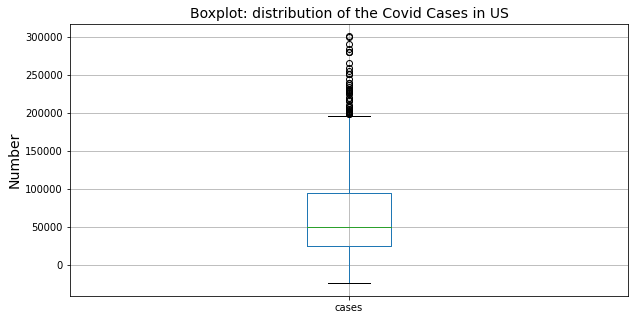

In [46]:
# create boxplot
plt.figure(figsize=(10, 5))
boxplot_cases = df_main_covid.boxplot(column=['cases'])
plt.title('Boxplot: distribution of the Covid Cases in US',fontsize=14, color='black')
plt.ylabel('Number', fontsize=14, color='black')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()

Text(0, 0.5, 'Number')

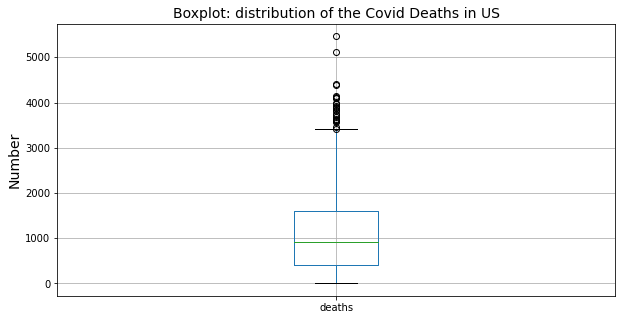

In [47]:
plt.figure(figsize=(10, 5))
boxplot_deaths = df_main_covid.boxplot(column=['deaths'])
plt.title('Boxplot: distribution of the Covid Deaths in US',fontsize=14, color='black')
plt.ylabel('Number', fontsize=14, color='black')


Text(0, 0.5, 'Frequency')

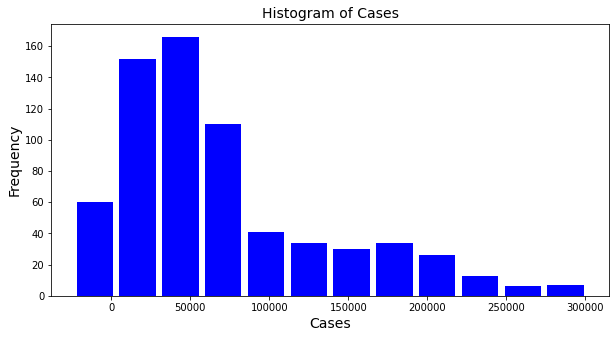

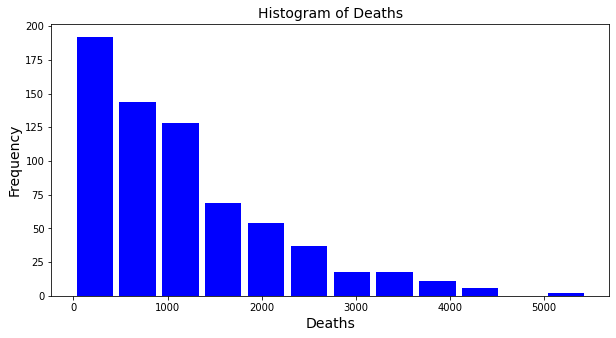

In [48]:
# Creating Histogram
plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['cases'], bins=12, color='blue', rwidth=0.85)
plt.title('Histogram of Cases',fontsize=14, color='black')
plt.xlabel('Cases', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.ticklabel_format(style='plain',axis='x') 



plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['deaths'], bins=12, color='blue', rwidth=0.85)
plt.title('Histogram of Deaths',fontsize=14, color='black')
plt.xlabel('Deaths', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')

Text(0, 0.5, 'Frequency')

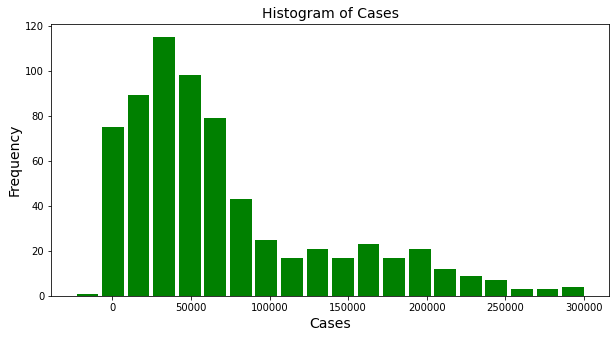

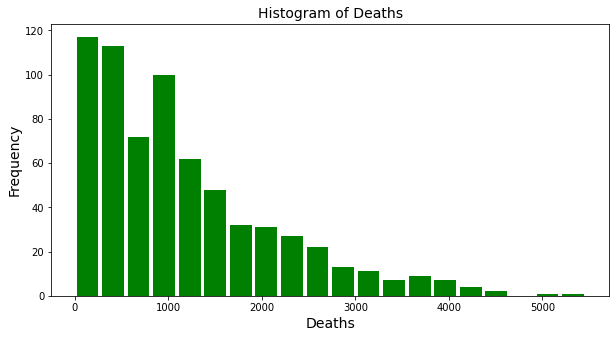

In [49]:
# Changing bins in Histogram
plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['cases'], bins=20, color='green', rwidth=0.85)
plt.title('Histogram of Cases',fontsize=14, color='black')
plt.xlabel('Cases', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.ticklabel_format(style='plain',axis='x') 



plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['deaths'], bins=20, color='green', rwidth=0.85)
plt.title('Histogram of Deaths',fontsize=14, color='black')
plt.xlabel('Deaths', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')

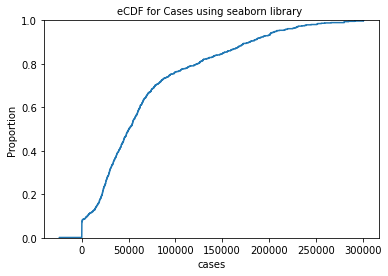

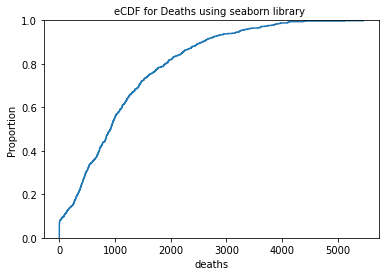

In [50]:
#Import seaborn library and generate ecdf plot
import seaborn as sns
sns.ecdfplot(x = df_main_covid['cases'])
plt.title('eCDF for Cases using seaborn library ',fontsize=10, color='black')
plt.ticklabel_format(style='plain',axis='x') 
plt.show()

sns.ecdfplot(x = df_main_covid['deaths'])
plt.title('eCDF for Deaths using seaborn library ',fontsize=10, color='black')
plt.show()

In [51]:
df_main_covid.head()

,date,cases,deaths
0,1/21/2020,1,0
1,1/22/2020,0,0
2,1/23/2020,0,0
3,1/24/2020,1,0
4,1/25/2020,1,0


In [52]:
import datetime 
df_main_covid.index = pd.to_datetime(df_main_covid['date'],format='%m/%d/%Y')
df_month= df_main_covid.groupby([pd.Grouper(freq='M')]).sum()

In [62]:
df_final = df_month.reset_index()
df_final

,date,cases,deaths
0,2020-01-31,7,0
1,2020-02-29,63,1
2,2020-03-31,188391,4303
3,2020-04-30,887295,58836
4,2020-05-31,723546,41239
5,2020-06-30,854019,23083
6,2020-07-31,1918348,26400
7,2020-08-31,1473788,29610
8,2020-09-30,1217278,23380
9,2020-10-31,1946272,23660


In [67]:
df_final['cases(m)'] = df_final['cases']/1000000 
df_final['deaths(m)'] = df_final['deaths']/1000000 
df_2020 = df_final[0:12]

<Figure size 720x360 with 0 Axes>

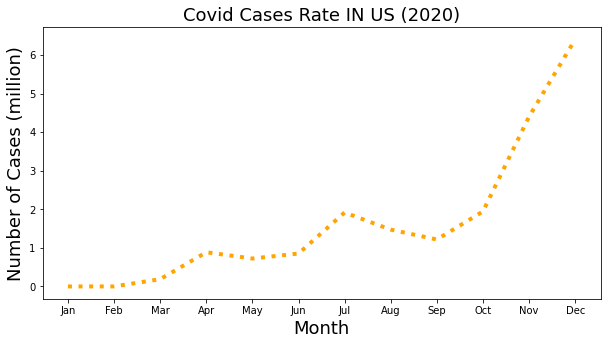

In [73]:
plt.figure(figsize=(10, 5))
date = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 5))
plt.plot(date, df_2020['cases(m)'], linewidth=4,linestyle='dotted', color = 'orange')
plt.title('Covid Cases Rate IN US (2020)',fontsize=18, color='black')
plt.xlabel('Month', fontsize=18, color='black')
plt.ylabel('Number of Cases (million)', fontsize=18, color='black')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()

<Figure size 720x360 with 0 Axes>

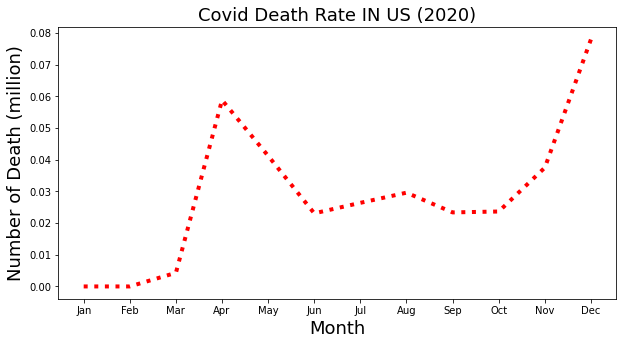

In [74]:
plt.figure(figsize=(10, 5))
date = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 5))
plt.plot(date, df_2020['deaths(m)'], linewidth=4,linestyle='dotted', color = 'red')
plt.title('Covid Death Rate IN US (2020)',fontsize=18, color='black')
plt.xlabel('Month', fontsize=18, color='black')
plt.ylabel('Number of Death (million)', fontsize=18, color='black')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()